# CAB420 Assignment 1A Question 3: Template and Utilities Demo
Simon Denman (s.denman@qut.edu.au)

## Overview

This notebook provides a quick demo and overview of the provided utility functions to help with Assignment 1A, Question 3.

It also implements the SVM that you are to compare against when responsing to the question.

## Utility Functions

The following cell contains utility functions to:
* Load the data
* Vectorise the data
* Plot images
* Resize all images
* Convert images to grayscale

These are provided to assist you in developing your solution.

In [1]:
#
# Utility functions for CAB420, Assignment 1A, Q3
# Author: Simon Denman (s.denman@qut.edu.au)
#

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from scipy.io import loadmat        # to load mat files
import matplotlib.pyplot as plt     # for plotting
import numpy as np                  # for reshaping, array manipulation
import cv2                          # for colour conversion
import tensorflow as tf             # for bulk image resize
from tensorflow.keras import layers
from tensorflow import keras
# metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import numpy


In [2]:
# Load data for Q3
#  train_path: path to training data mat file
#  test_path:  path to testing data mat file
#
#  returns:    arrays for training and testing X and Y data
#
def load_data(train_path, test_path):

    # load files
    train = loadmat(train_path)
    test = loadmat(test_path)

    # transpose, such that dimensions are (sample, width, height, channels), and divide by 255.0
    train_X = np.transpose(train['train_X'], (3, 0, 1, 2)) / 255.0
    train_Y = train['train_Y']
    # change labels '10' to '0' for compatability with keras/tf. The label '10' denotes the digit '0'
    train_Y[train_Y == 10] = 0
    train_Y = np.reshape(train_Y, -1)

    # transpose, such that dimensions are (sample, width, height, channels), and divide by 255.0
    test_X = np.transpose(test['test_X'], (3, 0, 1, 2)) / 255.0
    test_Y = test['test_Y']
    # change labels '10' to '0' for compatability with keras/tf. The label '10' denotes the digit '0'
    test_Y[test_Y == 10] = 0
    test_Y = np.reshape(test_Y, -1)

    # return loaded data
    return train_X, train_Y, test_X, test_Y

# vectorise an array of images, such that the shape is changed from {samples, width, height, channels} to
# (samples, width * height * channels)
#   images: array of images to vectorise
#
#   returns: vectorised array of images
#
def vectorise(images):
    # use numpy's reshape to vectorise the data
    return np.reshape(images, [len(images), -1])

# Plot some images and their labels. Will plot the first 100 samples in a 10x10 grid
#  x: array of images, of shape (samples, width, height, channels)
#  y: labels of the images
#
def plot_images(x, y):
    fig = plt.figure(figsize=[15, 18])
    for i in range(100):
        ax = fig.add_subplot(10, 10, i + 1)
        ax.imshow(x[i,:])
        ax.set_title(y[i])
        ax.axis('off')

# Resize an array of images
#  images:   array of images, of shape (samples, width, height, channels)
#  new_size: tuple of the new size, (new_width, new_height)
#
#  returns:  resized array of images, (samples, new_width, new_height, channels)
#
def resize(images, new_size):
    # tensorflow has an image resize funtion that can do this in bulk
    # note the conversion back to numpy after the resize
    return tf.image.resize(images, new_size).numpy()
          
# Convert images to grayscale
#   images:  array of colour images to convert, of size (samples, width, height, 3)
#
#   returns: array of converted images, of size (samples, width, height, 1)
#
def convert_to_grayscale(images):
    # storage for converted images
    gray = []
    # loop through images
    for i in range(len(images)):
        # convert each image using openCV
        gray.append(cv2.cvtColor(images[i,:], cv2.COLOR_BGR2GRAY))
    # pack converted list as an array and return
    return np.expand_dims(np.array(gray), axis = -1)

## Utility Function Demonstration

The following presents a brief demonstration of the utility functions. These portions of code do not form part of the template, or solution, and could be commented out/removed.

### Data Loading

Load the data, and visualise images.

(1000, 32, 32, 3)
(1000,)
(10000, 32, 32, 3)
(10000,)


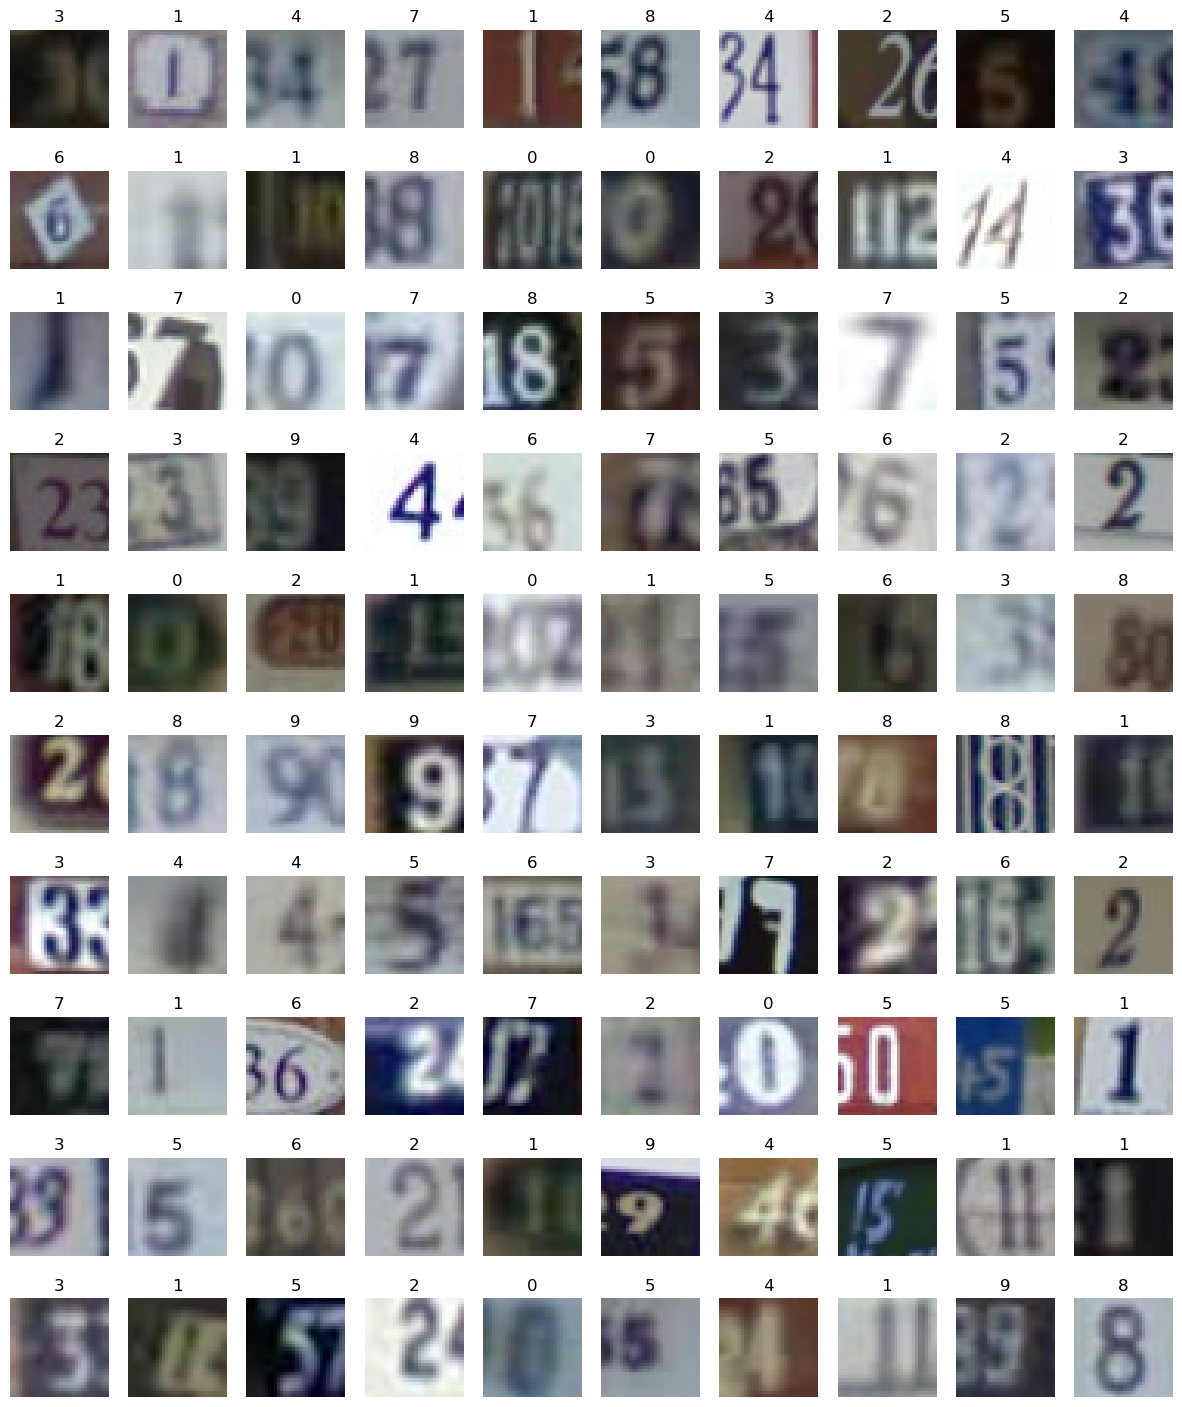

In [3]:
train_X, train_Y, test_X, test_Y = load_data('q3_train.mat', 'q3_test.mat')

# check shape of data
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

# visualise images as a sanity check
plot_images(train_X, train_Y)

### Vectorise Data

To train an SVM, each sample needs to be a vector rather than an image.

In [4]:
train_vector_X = vectorise(train_X)
test_vector_X = vectorise(test_X)
print(train_vector_X.shape)
print(test_vector_X.shape)

(1000, 3072)
(10000, 3072)


### Conversion and Resizing

You may wish to either:
* Resize images
* Convert images to grayscale

Two functions are provided to do this, and can be used in combination as shown below.

(1000, 20, 20, 1)


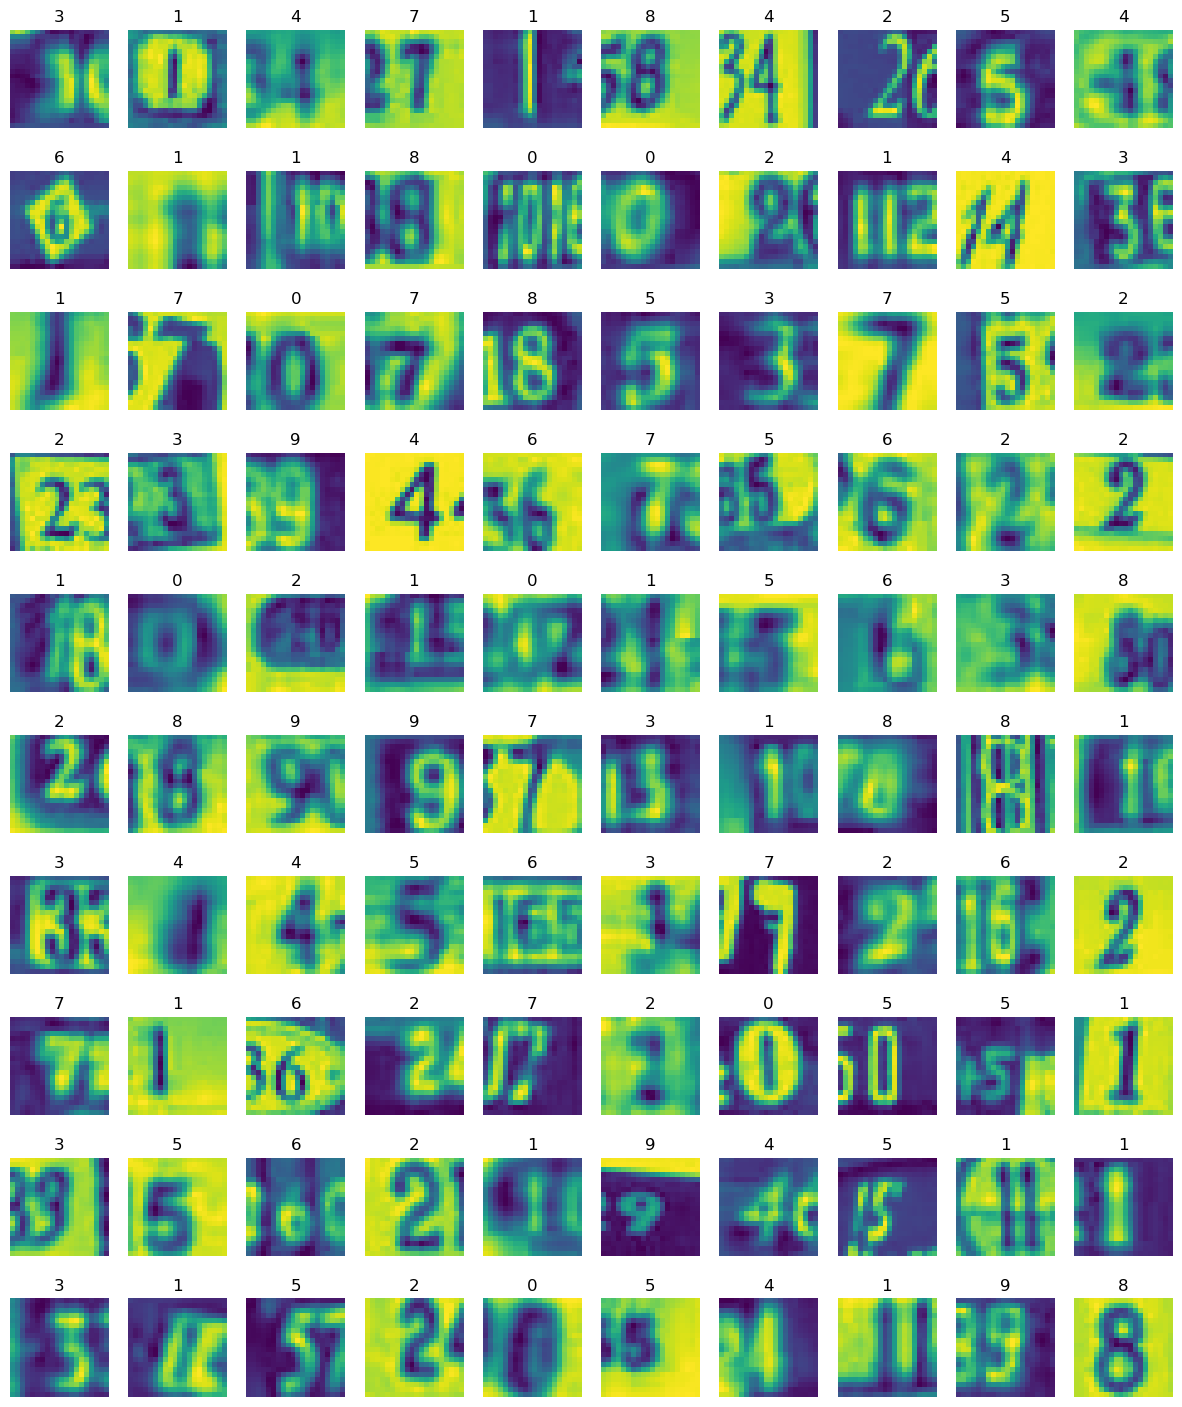

In [5]:
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))
print(train_X_small.shape)
plot_images(train_X_small, train_Y)

### Measuring Time

There are a lot of ways to measure time in python. A simple one is to use ``process_time`` within the ``time`` package. This will simply measure the ellapsed process time in seconds. We can use ths to measure individual parts of our code as follows:

In [6]:
# import process_time
from time import process_time

# get a start time
time_1 = process_time()

# do some stuff, in this case we'll just load some data
train_X, train_Y, test_X, test_Y = load_data('q3_train.mat', 'q3_test.mat')

# get the end time of our first lot of "stuff"
time_2 = process_time()

# do some other stuff
train_X_small = convert_to_grayscale(resize(train_X, (20, 20)))

# get the end time of our first lot of "stuff"
time_3 = process_time()

# the time it took to do "our stuff" is just the difference between the start and end times
print('Time to load data:   %f seconds' % (time_2 - time_1))
print('Time to resize data: %f seconds' % (time_3 - time_2))

Time to load data:   0.323613 seconds
Time to resize data: 0.038688 seconds


## Question 3 Template

The following provides a starting point for your solution. It trains the SVM that you are to compare your trained DCNNs against, and measures the time taken to train this SVM, and to perform inference with the train and test sets.

This does not measure the performance of the SVM - you will need to implement this as part of your solution.

In [7]:
def eval_model(model, train, train_y, test, test_y):
    fig = plt.figure(figsize=[20, 8])    

    ax = fig.add_subplot(1, 2, 1)    
    # predict on the training set
    pred = model.predict(train, verbose=False);
    # get indexes for the predictions and ground truth, this is converting back from a one-hot representation
    # to a single index
    indexes = tf.argmax(pred, axis=1)
    gt_idx = tf.argmax(train_y, axis=1)

    # plot the confusion matrix, I'm using tensorflow and seaborn here, but you could use
    # sklearn as well
    confusion_mtx = tf.math.confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    # set the title to the F1 scope
    ax.set_title('Training, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))
    ax.set_xlabel('Predicted labels') # Set the label for x-axis
    ax.set_ylabel('True labels') # Set the label for y-axis

    # repeat visualisation for the test set
    ax = fig.add_subplot(1, 2, 2)  
    pred = model.predict(test, verbose=False);
    indexes = tf.argmax(pred, axis=1)
    gt_idx = tf.argmax(test_y, axis=1)

    confusion_mtx = tf.math.confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    ax.set_title('Testing, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))
    ax.set_xlabel('Predicted labels') # Set the label for x-axis
    ax.set_ylabel('True labels') # Set the label for y-axis')

In [8]:
from sklearn.svm import SVC
from time import process_time

# load data
train_X, train_Y, test_X, test_Y = load_data('q3_train.mat', 'q3_test.mat')

# any resize, colour change, etc, would go here

# vectorise data
# make sure you vectorise the data you use with the DCNNs as input to the SVM for a fair comparison
train_vector_X = vectorise(train_X)
test_vector_X = vectorise(test_X)

# train the SVM

svm_train_start = process_time()
svm = SVC(C = 1.0, kernel = 'linear').fit(train_vector_X, train_Y)
svm_train_end = process_time()
train_predictions = svm.predict(train_vector_X)
svm_train_pred_end = process_time()
test_predictions = svm.predict(test_vector_X)
svm_test_pred_end = process_time()

svm_train_time = svm_train_end - svm_train_start
svm_inference_train_time = svm_train_pred_end - svm_train_end
svm_inference_test_time = svm_test_pred_end - svm_train_pred_end
print('Training Time: %f\nInference Time (training set): %f\nInference Time (testing set): %f' % \
      (svm_train_time, svm_inference_train_time, svm_inference_test_time))

Training Time: 3.005368
Inference Time (training set): 1.275190
Inference Time (testing set): 13.181917


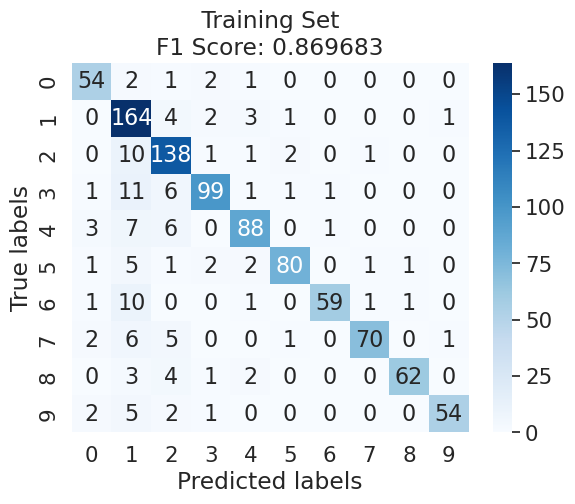

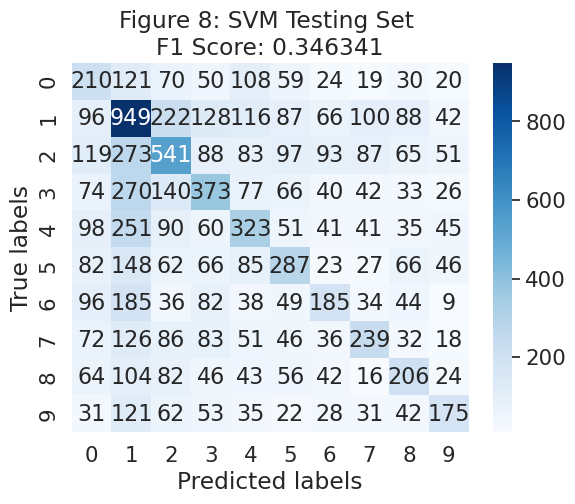

Training F1 Score: 0.869683033880936
Testing F1 Score: 0.3463405029580538


In [9]:
# evaluate SVM
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# calculate confusion matrix and f1 score for training set
train_cm = confusion_matrix(train_Y, train_predictions)
train_f1 = f1_score(train_Y, train_predictions, average='weighted')

# plot confusion matrix for training set
sns.set(font_scale=1.4) # Adjust the font size
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # Create a heatmap using Seaborn library
plt.title(' Training Set \nF1 Score: %f' % train_f1) # Set the plot title
plt.xlabel('Predicted labels') # Set the label for x-axis
plt.ylabel('True labels') # Set the label for y-axis
plt.show() # Display the plot

# calculate confusion matrix and f1 score for testing set
test_cm = confusion_matrix(test_Y, test_predictions)
test_f1 = f1_score(test_Y, test_predictions, average='weighted')

# plot confusion matrix for testing set
sns.set(font_scale=1.4) # Adjust the font size
sns.heatmap(test_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # Create a heatmap using Seaborn library
plt.title('Figure 8: SVM Testing Set \nF1 Score: %f' % test_f1) # Set the plot title
plt.xlabel('Predicted labels') # Set the label for x-axis
plt.ylabel('True labels') # Set the label for y-axis
plt.show() # Display the plot

# print F1 scores
print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

# from sklearn.metrics import classification_report

# # Get predictions on the test set using the best model
# y_pred = svm.predict(test_X)

# # Print the precision, recall, and F1-score for each class
# print(classification_report(test_Y, y_pred))


In [10]:
# develop, evaluate and compare DCNNs

In [11]:
# network input, images are 32 pixels square, and colour; so our size is 32 x 32 x 3
inputs = keras.Input(shape=(32, 32, 3, ), name='img')

# 7x7 conv block, we have a conv2D layer with 16 filters (increased from 8 in the original model)
x = layers.Conv2D(filters=16, kernel_size=(7, 7), padding='same', activation='relu')(inputs)
# max pooling, with a 4x4 window. This will reduce the representation size from 32x32 to 8x8
x = layers.MaxPool2D(pool_size=(4, 4))(x)

# 5x5 conv block, the structure here is the same as the first block, but with more filters and an activation layer
x = layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# 3x3 conv block, again there is an increase in the number of filters
x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)

# flatten layer
x = layers.Flatten()(x)

# dense layer, 256 neurons (decreased from 512 in the original model)
x = layers.Dense(256, activation='relu')(x)

# dropout layer to prevent overfitting
x = layers.Dropout(0.5)(x)

# the output, 10 neurons for 10 classes
outputs = layers.Dense(10, activation='softmax')(x)

# build the model, and print a summary
model_alexnet = keras.Model(inputs=inputs, outputs=outputs, name='modified_alexnet_for_SVHM')
model_alexnet.summary()


Model: "modified_alexnet_for_SVHM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        2368      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4,

In [12]:
train_X, train_Y, test_X, test_Y = load_data('q3_train.mat', 'q3_test.mat')
model_alexnet.reset_states()
model_alexnet.compile(
    # categorical cross entropy loss
    loss='categorical_crossentropy',
    # adam optimiser
    optimizer=keras.optimizers.Adam(),
    # compute the accuracy metric, in addition to the loss 
    metrics=['accuracy'])

from keras.utils import to_categorical

train_Y = to_categorical(train_Y, num_classes=10)
test_Y = to_categorical(test_Y, num_classes=10)

# train the model
# we'll capture the returned history object that will tell us about the training performance
dcnn_train_start = process_time()
history = model_alexnet.fit(train_X, train_Y,
                            batch_size=128,
                            epochs=40,
                            validation_data=(test_X, test_Y),
                            verbose=False)
dcnn_train_end = process_time()
dcnn_train_time = dcnn_train_end - dcnn_train_start

# make predictions on the training and testing sets
train_pred = model_alexnet.predict(train_X)
test_pred = model_alexnet.predict(test_X)

# measure the inference time on the training set
dcnn_inference_train_start = process_time()
train_pred = model_alexnet.predict(train_X)
dcnn_inference_train_end = process_time()
dcnn_inference_train_time = dcnn_inference_train_end - dcnn_inference_train_start

# measure the inference time on the test set
dcnn_inference_test_start = process_time()
test_pred = model_alexnet.predict(test_X)
dcnn_inference_test_end = process_time()
dcnn_inference_test_time = dcnn_inference_test_end - dcnn_inference_test_start

print('DCNN Training Time: %f\nDCNN Inference Time (training set): %f\nDCNN Inference Time (testing set): %f' % \
      (dcnn_train_time, dcnn_inference_train_time, dcnn_inference_test_time))


313/313 [==============================] - 0s 1ms/step
DCNN Training Time: 20.147088
DCNN Inference Time (training set): 0.153613
DCNN Inference Time (testing set): 1.109977


Text(0.5, 1.0, 'Figure 2: Training and Validation Accuracy')

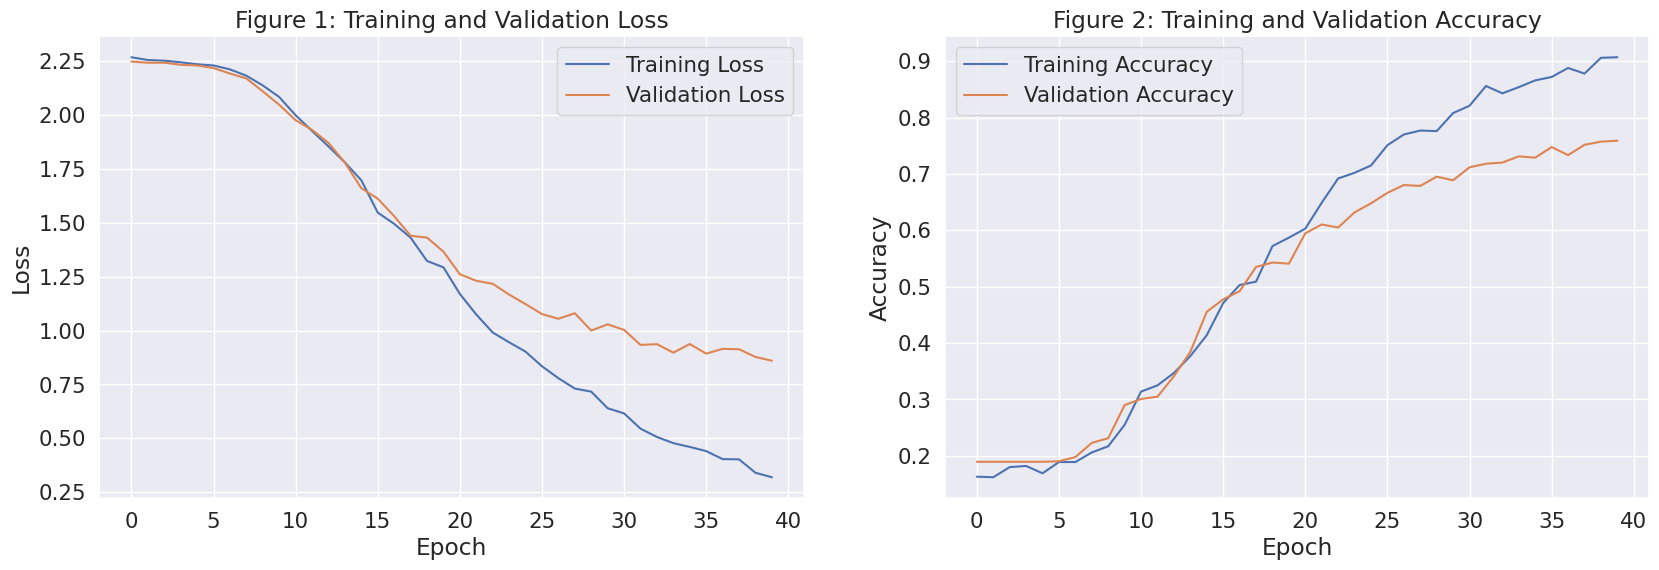

In [13]:
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'], label="Training Loss")
ax.plot(history.history['val_loss'], label="Validation Loss")
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Figure 1: Training and Validation Loss')

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'], label="Training Accuracy")
ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Figure 2: Training and Validation Accuracy')

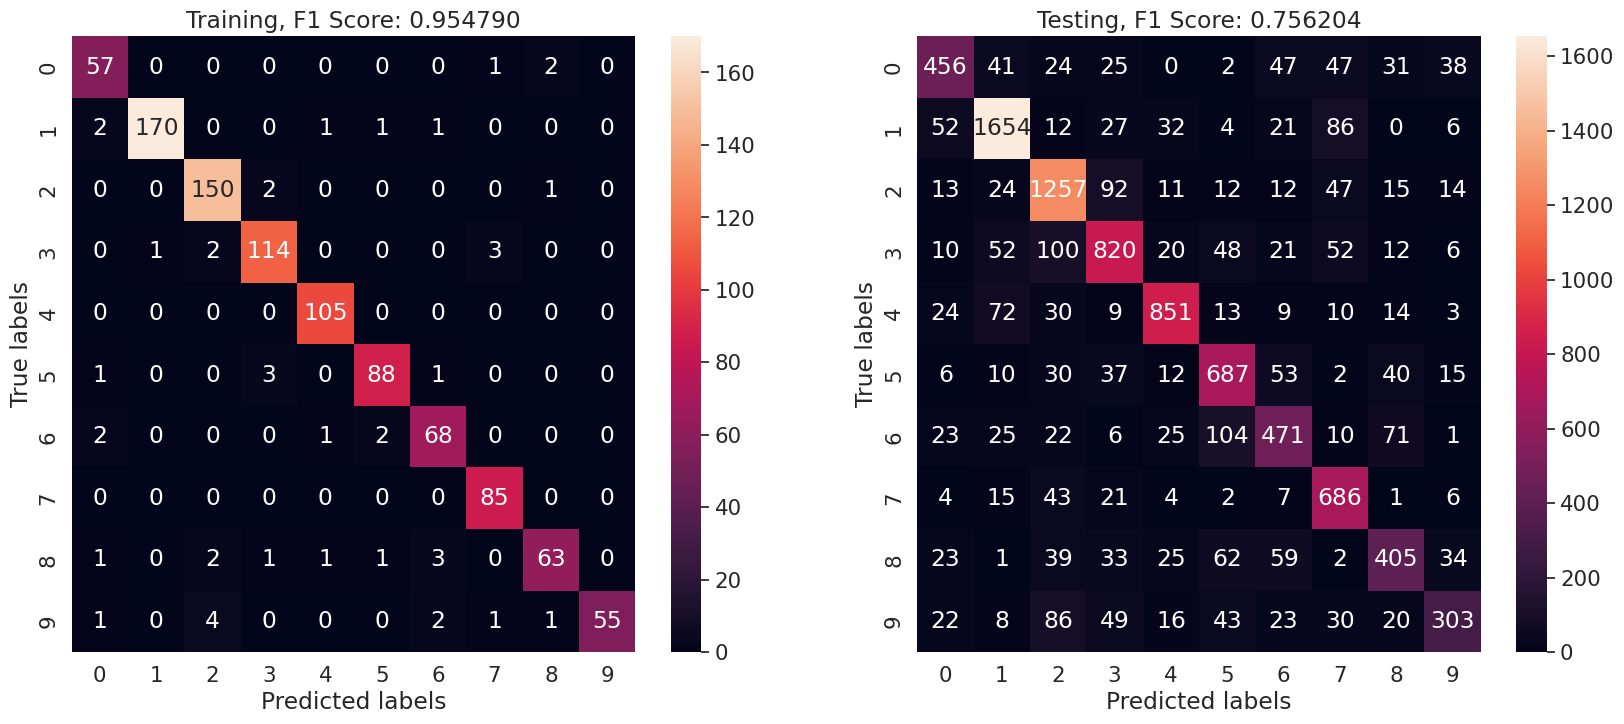

In [14]:
    
eval_model(model_alexnet, train_X, train_Y, test_X, test_Y)

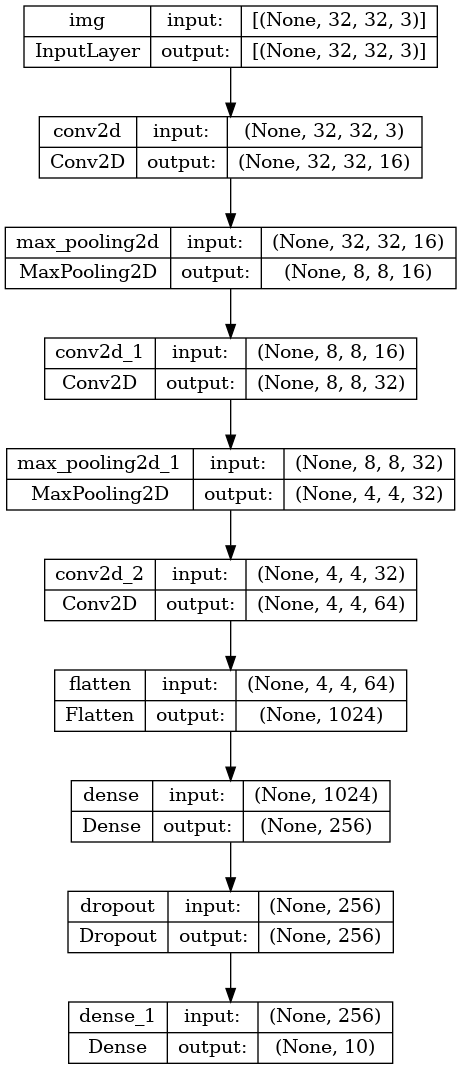

In [15]:
keras.utils.plot_model(model_alexnet, show_shapes=True)

With Data Augmentation
Let's rinse and repeat now using some data augmentation.

There are a lot of data augmentation options with Keras, and we won't go into all of them here, but the help does a pretty good job of listing what can be done here and here.

We'll keep it pretty simple, and include:

random horizontal flips
small rotations
small scale changes
small translations
We should always visualise our augmentation, so we'll take 10 images, and augment each of them 10 times to get a sense of the variation that's possible.

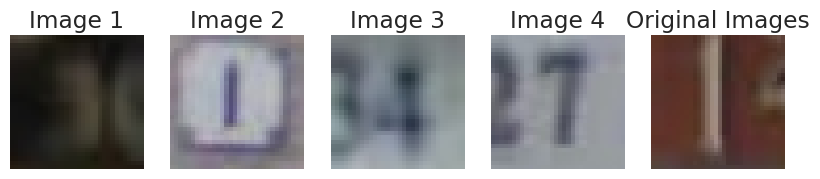

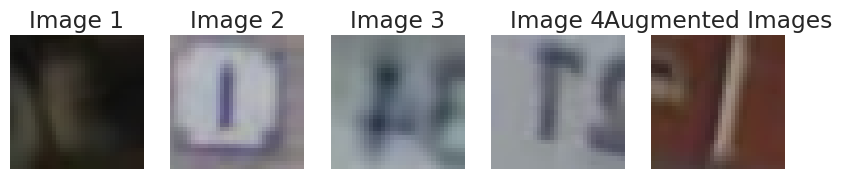

In [20]:
from keras.preprocessing.image import ImageDataGenerator

# create an instance of the ImageDataGenerator class with data augmentation parameters
data_augmentation = ImageDataGenerator(
  rotation_range=15, # randomly rotate images by up to 5 degrees
  width_shift_range=0.05, # randomly shift images horizontally by 5% of their size
  height_shift_range=0.05, # randomly shift images vertically by 5% of their size
  zoom_range=0.05, # randomly zoom images by up to 5% of their size
  horizontal_flip=True, # randomly flip images horizontally
)

# plot the first 5 images from the original training dataset
fig, axs = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axs[i].imshow(train_X[i])
    axs[i].set_title(f"Image {i+1}")
    axs[i].axis("off")
plt.title("Original Images")
plt.show()

# plot the first 5 images after data augmentation
fig, axs = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    augmented_image = data_augmentation.flow(tf.expand_dims(train_X[i,:,:,:],0)).next()[0]

    axs[i].imshow(augmented_image)
    axs[i].set_title(f"Image {i+1}")
    axs[i].axis("off")
plt.title("Augmented Images")
plt.show()



In [17]:
#
# network input, images are 32 pixels square, and colour; so our size is 32 x 32 x 3
inputs = keras.Input(shape=(32, 32, 3, ), name='img')

# 7x7 conv block, we have a conv2D layer with 16 filters (increased from 8 in the original model)
x = layers.Conv2D(filters=16, kernel_size=(7, 7), padding='same', activation='relu')(inputs)
# max pooling, with a 4x4 window. This will reduce the representation size from 32x32 to 8x8
x = layers.MaxPool2D(pool_size=(4, 4))(x)

# 5x5 conv block, the structure here is the same as the first block, but with more filters and an activation layer
x = layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# 3x3 conv block, again there is an increase in the number of filters
x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)

# flatten layer
x = layers.Flatten()(x)

# dense layer, 256 neurons (decreased from 512 in the original model)
x = layers.Dense(256, activation='relu')(x)

# dropout layer to prevent overfitting
x = layers.Dropout(0.5)(x)

# the output, 10 neurons for 10 classes
outputs = layers.Dense(10, activation='softmax')(x)

# build the model, and print a summary
model_alexnet = keras.Model(inputs=inputs, outputs=outputs, name='modified_alexnet_for_SVHM')

# compile the model
model_alexnet.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)
import time
# train the model and capture the training history
start_time = time.time()
history = model_alexnet.fit(
    data_augmentation.flow(train_X, train_Y, batch_size=512),
    steps_per_epoch=len(train_X) / 512, 
    epochs=250,
    validation_data=(test_X, test_Y), 
    verbose=False 
)
end_time = time.time()
train_time = end_time - start_time

# measure inference time on training set
start_time = time.time()
train_pred = model_alexnet.predict(train_X)
end_time = time.time()
train_inference_time = end_time - start_time

# measure inference time on test set
start_time = time.time()
test_pred = model_alexnet.predict(test_X)
end_time = time.time()
test_inference_time = end_time - start_time

print('Training Time:', train_time)
print('Inference Time (Training Set):', train_inference_time)
print('Inference Time (Test Set):', test_inference_time)


313/313 [==============================] - 1s 2ms/step
Training Time: 280.3917019367218
Inference Time (Training Set): 0.21068167686462402
Inference Time (Test Set): 0.9521172046661377


Text(0.5, 1.0, 'Figure 6:\n with augmentation\n  Training and Validation Accuracy')

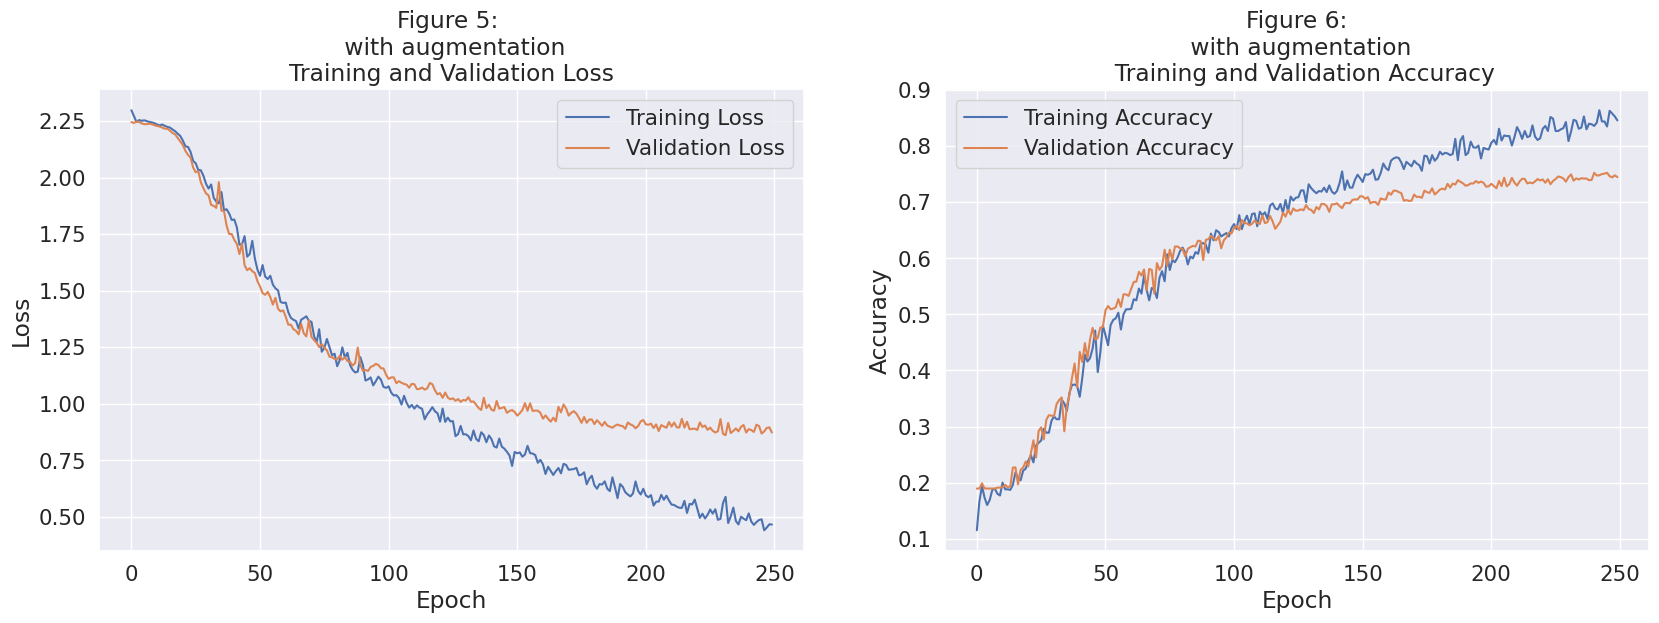

In [18]:
fig = plt.figure(figsize=[20, 6])
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'], label="Training Loss")
ax.plot(history.history['val_loss'], label="Validation Loss")
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Figure 5: \n with augmentation\nTraining and Validation Loss')

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'], label="Training Accuracy")
ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Figure 6:\n with augmentation\n  Training and Validation Accuracy')

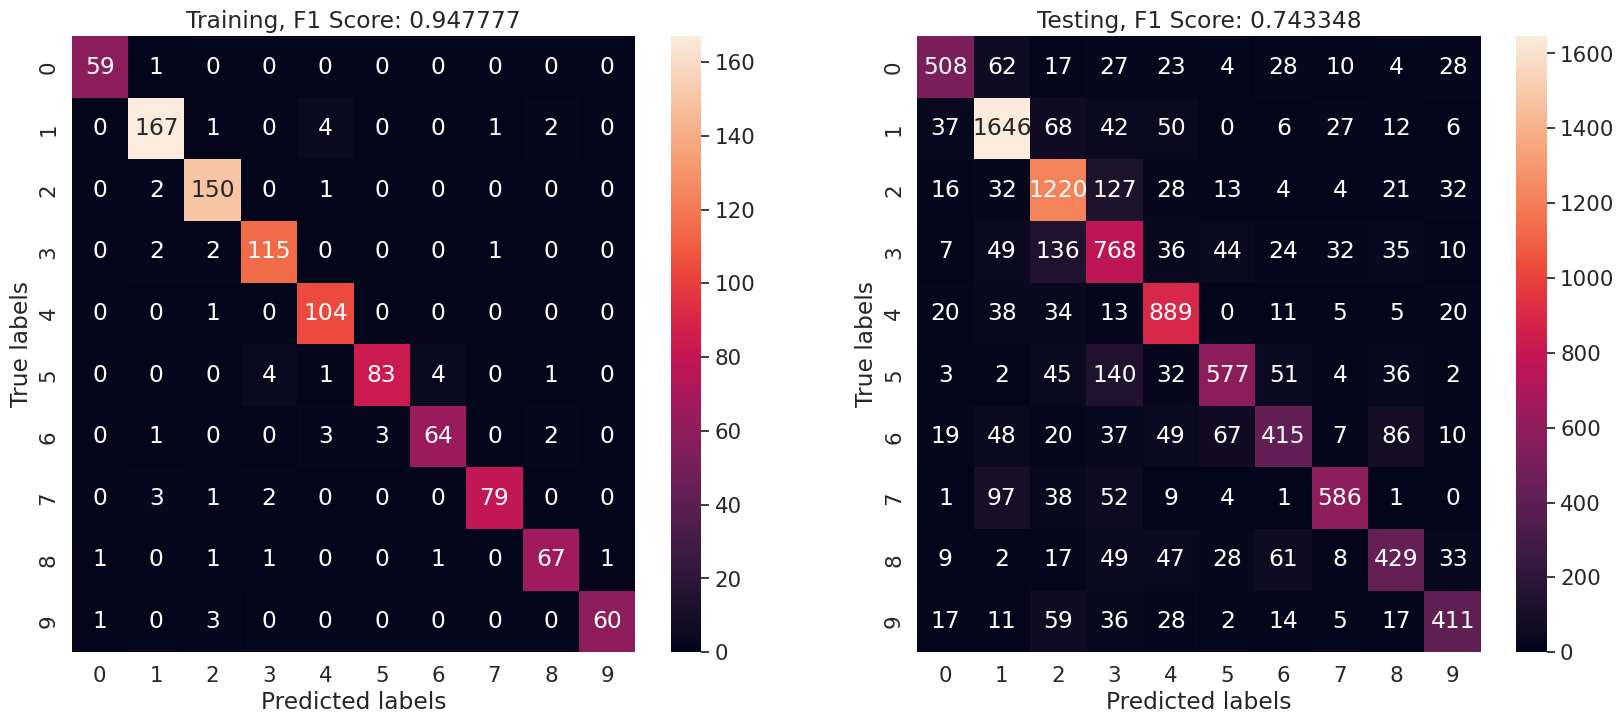

In [19]:
eval_model(model_alexnet, train_X, train_Y, test_X, test_Y)